<a href="https://colab.research.google.com/github/RodrigoSalgadoA/Big-Data-NFL-2025/blob/main/Performance_Case_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-65-830836af5c62>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metrics['RANK_TRIPS'] = df_metrics['TRIPS'].rank(ascending=False)
<ipython-input-65-830836af5c62>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metrics['RANK_GB'] = df_metrics['GROSS BOOKINGS (GB)'].rank(ascending=False)
<ipython-input-65-830836af5c62>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat


Tasa de cancelación de conductores:
             CITY DRIVER CANCELATION
20   Old Trafford              32.0%
12   Old Trafford              31.0%
28   Old Trafford              31.0%
36   Old Trafford              27.0%
4    Old Trafford              27.0%
..            ...                ...
129     Rose Bowl              14.0%
105     Rose Bowl              13.0%
113     Rose Bowl              13.0%
81      Rose Bowl              13.0%
97      Rose Bowl              13.0%

[168 rows x 2 columns]

Tasa de utilización de la oferta:
             CITY SUPPLY UTILIZATION
20   Old Trafford              81.0%
13       Maracanã              81.0%
28   Old Trafford              80.0%
12   Old Trafford              80.0%
21       Maracanã              80.0%
..            ...                ...
161     Rose Bowl              56.0%
49      Rose Bowl              56.0%
97      Rose Bowl              55.0%
145     Rose Bowl              55.0%
113     Rose Bowl              55.0%

[168 rows x 2 c

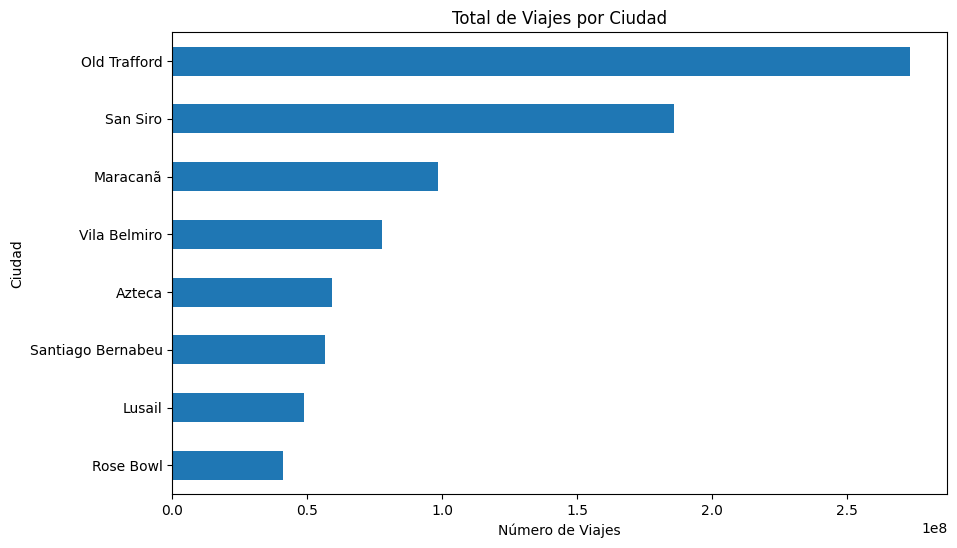

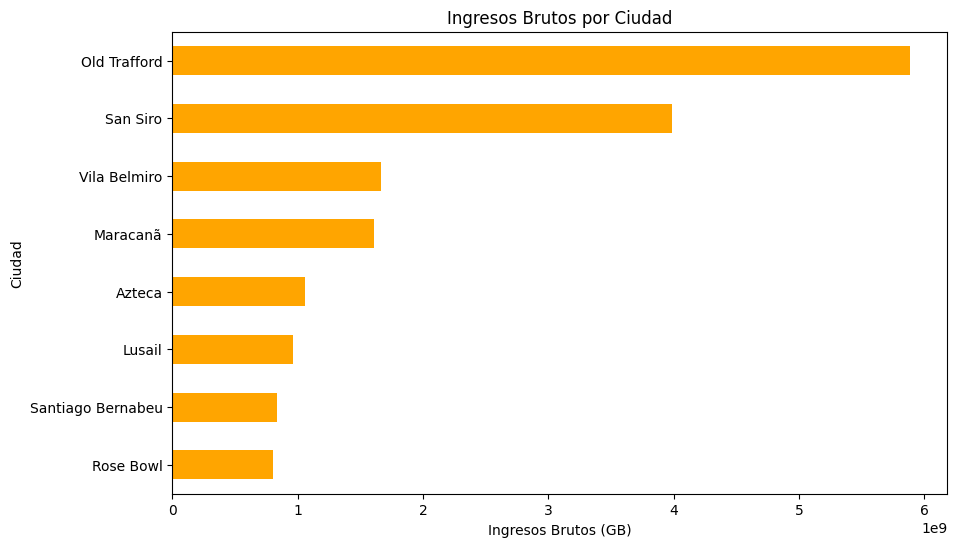

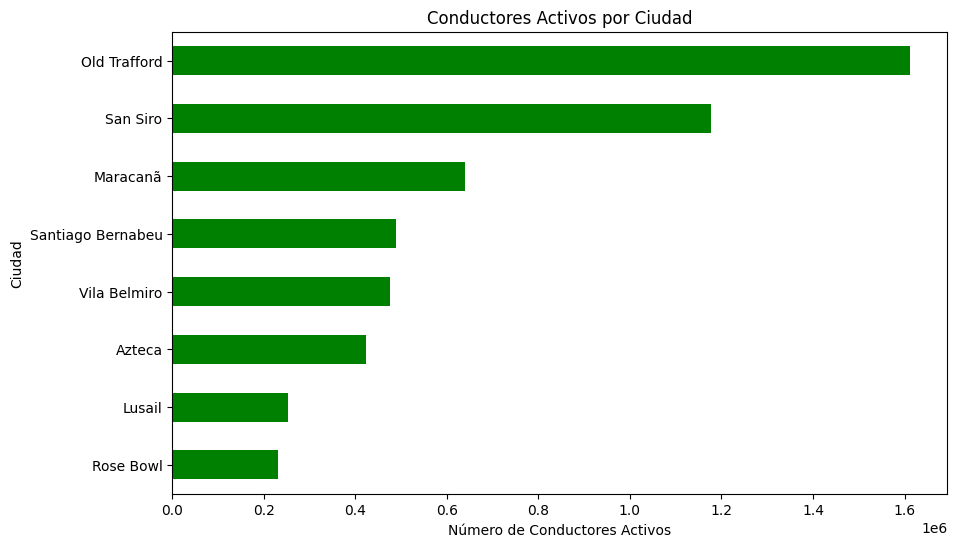

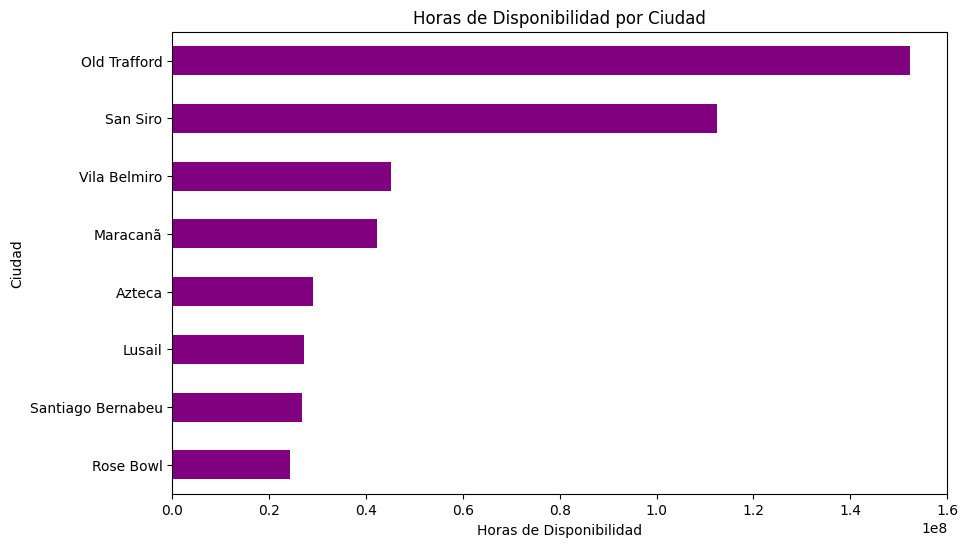

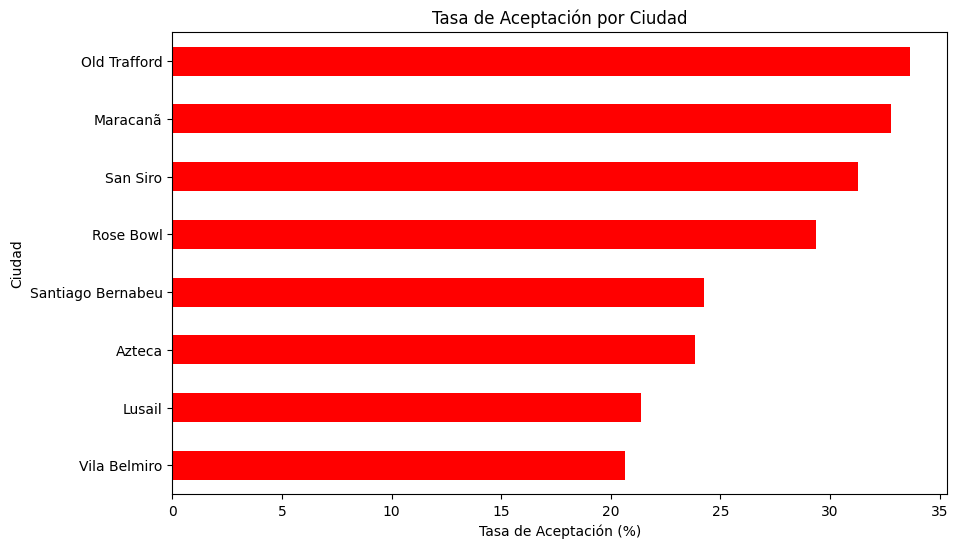

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset desde un archivo CSV
df = pd.read_csv('/content/Performance_Case_Data.csv')

# Seleccionar las métricas relevantes
metrics = ['MONTH', 'CITY', 'TRIPS', 'GROSS BOOKINGS (GB)', 'ACTIVE DRIVERS', 'SUPPLY HOURS', 'ACCEPTANCE RATE', 'DRIVER CANCELATION']

# Filtrar las columnas relevantes
df_metrics = df[metrics]

# Calcular estadísticas descriptivas para las métricas seleccionadas
stats = df_metrics.describe()

# Calcular el ranking basado en TRIPS y GROSS BOOKINGS (GB)
df_metrics['RANK_TRIPS'] = df_metrics['TRIPS'].rank(ascending=False)
df_metrics['RANK_GB'] = df_metrics['GROSS BOOKINGS (GB)'].rank(ascending=False)

# Promedio de rankings para determinar las ciudades mejor calificadas
df_metrics['AVG_RANK'] = df_metrics[['RANK_TRIPS', 'RANK_GB']].mean(axis=1)

# Ordenar por AVG_RANK para obtener las ciudades mejor calificadas
df_sorted = df_metrics.sort_values('AVG_RANK')

# Ordenar las ciudades por DRIVER CANCELATION en orden descendente
df_canceled = df.sort_values(by='DRIVER CANCELATION', ascending=False)

# Ordenar las ciudades por SUPPLY UTILIZATION en orden descendente
df_utilization = df.sort_values(by='SUPPLY UTILIZATION', ascending=False)

# Mostrar las tasas calculadas de cancelación de conductores en las ciudades
print("\nTasa de cancelación de conductores:")
print(df_canceled[['CITY', 'DRIVER CANCELATION']])

# Mostrar la tasa de utilización de la oferta en las ciudades
print("\nTasa de utilización de la oferta:")
print(df_utilization[['CITY', 'SUPPLY UTILIZATION']])

#Mostrar las ciudades mejor calificadas en el servicio
print("\nCiudades con mejor ranking de servicio:")
print(df_sorted[['CITY', 'AVG_RANK']])

# Convertir las columnas en valores numéricos
df_metrics['TRIPS'] = df_metrics['TRIPS'].str.replace(',', '').astype(int)
df_metrics['GROSS BOOKINGS (GB)'] = df_metrics['GROSS BOOKINGS (GB)'].str.replace(',', '').astype(int)
df_metrics['ACTIVE DRIVERS'] = df_metrics['ACTIVE DRIVERS'].str.replace(',', '').astype(int)
df_metrics['SUPPLY HOURS'] = df_metrics['SUPPLY HOURS'].str.replace(',', '').astype(int)
df_metrics['ACCEPTANCE RATE'] = df_metrics['ACCEPTANCE RATE'].str.rstrip('%').astype(float)

# Gráfico de TRIPS por ciudad
plt.figure(figsize=(10, 6))
df_metrics.groupby('CITY')['TRIPS'].sum().sort_values().plot(kind='barh')
plt.title('Total de Viajes por Ciudad')
plt.xlabel('Número de Viajes')
plt.ylabel('Ciudad')
plt.show()

# Gráfico de GROSS BOOKINGS por ciudad
plt.figure(figsize=(10, 6))
df_metrics.groupby('CITY')['GROSS BOOKINGS (GB)'].sum().sort_values().plot(kind='barh', color='orange')
plt.title('Ingresos Brutos por Ciudad')
plt.xlabel('Ingresos Brutos (GB)')
plt.ylabel('Ciudad')
plt.show()

# Gráfico de ACTIVE DRIVERS por ciudad
plt.figure(figsize=(10, 6))
df_metrics.groupby('CITY')['ACTIVE DRIVERS'].sum().sort_values().plot(kind='barh', color='green')
plt.title('Conductores Activos por Ciudad')
plt.xlabel('Número de Conductores Activos')
plt.ylabel('Ciudad')
plt.show()

# Gráfico de SUPPLY HOURS por ciudad
plt.figure(figsize=(10, 6))
df_metrics.groupby('CITY')['SUPPLY HOURS'].sum().sort_values().plot(kind='barh', color='purple')
plt.title('Horas de Disponibilidad por Ciudad')
plt.xlabel('Horas de Disponibilidad')
plt.ylabel('Ciudad')
plt.show()

# Gráfico de ACCEPTANCE RATE por ciudad
plt.figure(figsize=(10, 6))
df_metrics.groupby('CITY')['ACCEPTANCE RATE'].mean().sort_values().plot(kind='barh', color='red')
plt.title('Tasa de Aceptación por Ciudad')
plt.xlabel('Tasa de Aceptación (%)')
plt.ylabel('Ciudad')
plt.show()